# Lesson 2. Elementary Statistics on real data examples with R
# *Quantitative Data*

## This tutorial will use examples from the e-book "R Tutorial with Bayesian Statistics Using OpenBUGS". Available here:
https://www.amazon.com/dp/B006ZP4SKW

## and on examples from http://www.r-tutor.com/


### Quantitative data sample

Quantitative data consists of **numeric** data that support arithmetic operations.<br>
This is very different from qualitative data, where values belong to pre-defined classes with no arithmetic operation allowed. <br> 
We will use a built-in data frame named **faithful**. It consists of a collection of observations of the Old Faithful geyser in the USA Yellowstone National Park. 




In [1]:
head(faithful) 
#help(faithful)

eruptions,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


The observation variable *eruptions*, is the duration of the geyser eruptions. The *waiting* one, is the length of waiting period until the next eruption. Are those two variables correlated?

## The *frequency distribution* of a data variable is a summary of the data occurrence in a collection of non-overlapping categories.

Example
In the data set faithful, the frequency distribution of the eruptions variable is the summary of eruptions according to the eruption durations.

Problem
Find the frequency distribution of the eruption durations in faithful.

Solution: We go through the following 4 steps.


**Step1**. We first find the range of eruption durations with the range function. It shows that the observed eruptions are between 1.6 and 5.1 minutes in duration.<br>

In [2]:
duration = faithful$eruptions 
range(duration)

[1] 1.6 5.1

**Step2**. Break the range into non-overlapping sub-intervals by defining a sequence of equal distance break points. If we round the endpoints of the interval [1.6, 5.1] to the closest half-integers, we come up with the interval [1.5, 5.5]. 

In [3]:
#Break the range into non-overlapping sub-intervals by defining a sequence of equal distance break points. If we round the endpoints of the interval [1.6, 5.1] to the closest half-integers, we come up with the interval [1.5, 5.5]. Hence we set the break points to be the half-integer sequence { 1.5, 2.0, 2.5, ... }.
breaks = seq(1.5, 5.5, by=0.5)    # half-integer sequence 
print(breaks)


[1] 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5


**Step3**. Classify the eruption durations according to the half-unit-length sub-intervals with cut. As the intervals are to be closed on the left, and open on the right, we set the right argument as FALSE.

In [4]:
#Classify the eruption durations according to the half-unit-length sub-intervals with cut.
#As the intervals are to be closed on the left, and open on the right, we set the right argument as FALSE.
duration.cut = cut(duration, breaks, right=FALSE)
print(duration.cut)

  [1] [3.5,4) [1.5,2) [3,3.5) [2,2.5) [4.5,5) [2.5,3) [4.5,5) [3.5,4) [1.5,2)
 [10] [4,4.5) [1.5,2) [3.5,4) [4,4.5) [1.5,2) [4.5,5) [2,2.5) [1.5,2) [4.5,5)
 [19] [1.5,2) [4,4.5) [1.5,2) [1.5,2) [3,3.5) [3,3.5) [4.5,5) [3.5,4) [1.5,2)
 [28] [4,4.5) [3.5,4) [4,4.5) [4,4.5) [4,4.5) [3,3.5) [4,4.5) [3.5,4) [2,2.5)
 [37] [1.5,2) [4.5,5) [1.5,2) [4.5,5) [4,4.5) [1.5,2) [4.5,5) [1.5,2) [4.5,5)
 [46] [3,3.5) [3.5,4) [2,2.5) [4.5,5) [2,2.5) [4.5,5) [4.5,5) [1.5,2) [4.5,5)
 [55] [1.5,2) [4.5,5) [3.5,4) [1.5,2) [4.5,5) [4,4.5) [2,2.5) [4.5,5) [1.5,2)
 [64] [4.5,5) [1.5,2) [4,4.5) [4,4.5) [4.5,5) [2,2.5) [4.5,5) [4,4.5) [1.5,2)
 [73] [4.5,5) [4,4.5) [1.5,2) [5,5.5) [2,2.5) [4.5,5) [3.5,4) [3.5,4) [4,4.5)
 [82] [4,4.5) [4,4.5) [2.5,3) [4,4.5) [4.5,5) [3.5,4) [4.5,5) [2,2.5) [4,4.5)
 [91] [2,2.5) [4,4.5) [1.5,2) [4.5,5) [1.5,2) [4,4.5) [4.5,5) [3.5,4) [1.5,2)
[100] [4.5,5) [2,2.5) [4,4.5) [2,2.5) [4.5,5) [4,4.5) [1.5,2) [4.5,5) [1.5,2)
[109] [4.5,5) [3.5,4) [4.5,5) [2,2.5) [4.5,5) [4,4.5) [1.5,2) [4

**Step4**. Compute the frequency of eruptions in each sub-interval with the table function.

In [5]:
#Compute the frequency of eruptions in each sub-interval with the table function.
 duration.freq = table(duration.cut)


cbind(duration.freq) 

,duration.freq
"[1.5,2)",51
"[2,2.5)",41
"[2.5,3)",5
"[3,3.5)",7
"[3.5,4)",30
"[4,4.5)",73
"[4.5,5)",61
"[5,5.5)",4


In [6]:
#If we find the sample size of faithful with the nrow function, 
#and divide the frequency distribution with it, asa result we get the relative frequency distribution

duration.relfreq = duration.freq / nrow(faithful)
cbind(duration.freq, duration.relfreq)

,duration.freq,duration.relfreq
"[1.5,2)",51,0.18750000
"[2,2.5)",41,0.15073529
"[2.5,3)",5,0.01838235
"[3,3.5)",7,0.02573529
"[3.5,4)",30,0.11029412
"[4,4.5)",73,0.26838235
"[4.5,5)",61,0.22426471
"[5,5.5)",4,0.01470588


## Exercise
Find the frequency distribution of the eruption waiting periods in faithful. <br>
Find programmatically the duration sub-interval that has the most eruptions.

## Kernel Density Plot
Kernal density plots are usually a much more effective way to view the distribution of a variable. Create the plot using **plot(density(x))** where x is a numeric vector.

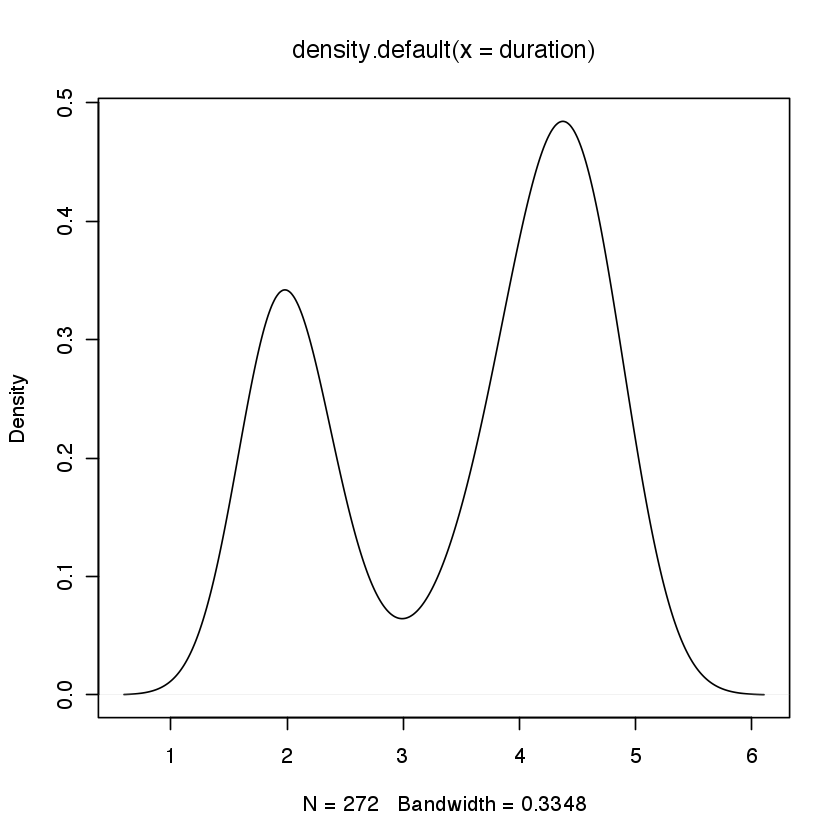

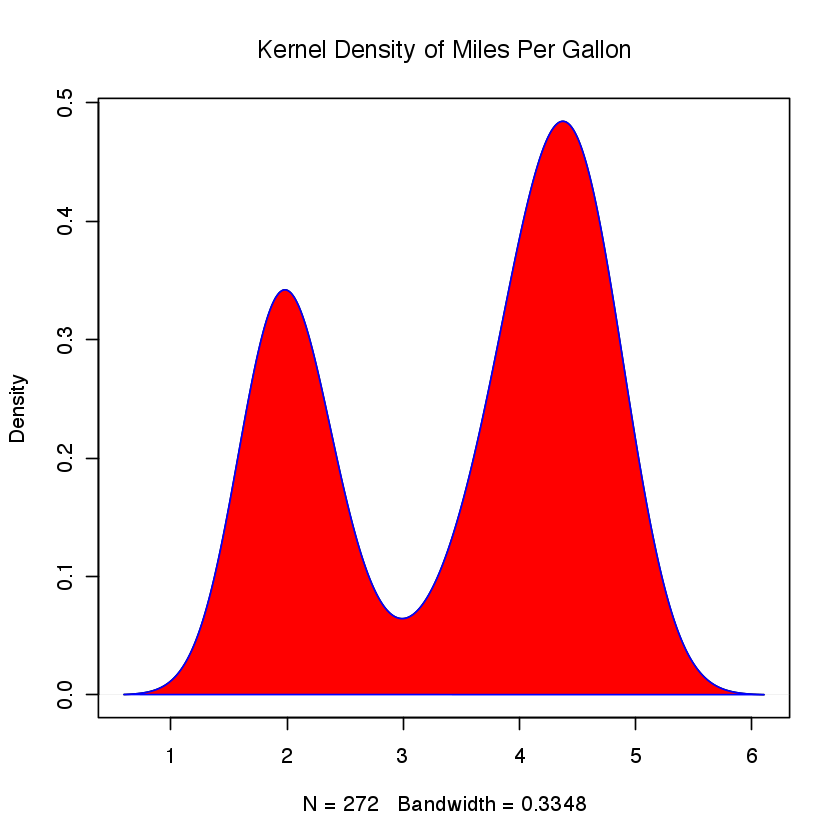

In [7]:
d <- density(duration) # returns the density data 
plot(d) # plots the results

 # Filled Density Plot
plot(d, main="Kernel Density of Miles Per Gallon")
polygon(d, col="red", border="blue")

## Exercise
plot the density estimation of the mpg variable in the buit-in data set **mtcars**

In [8]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


## Histogram
### A histogram consists of parallel vertical bars that graphically shows the frequency distribution of a quantitative variable. The area of each bar is equal to the frequency of items found in each class.

Example
In the data set faithful, the histogram of the eruptions variable is a collection of parallel vertical bars showing the number of eruptions classified according to their durations.

Problem
Find the histogram of the eruption durations in faithful.

Solution
We apply the hist function to produce the histogram of the eruptions variable.



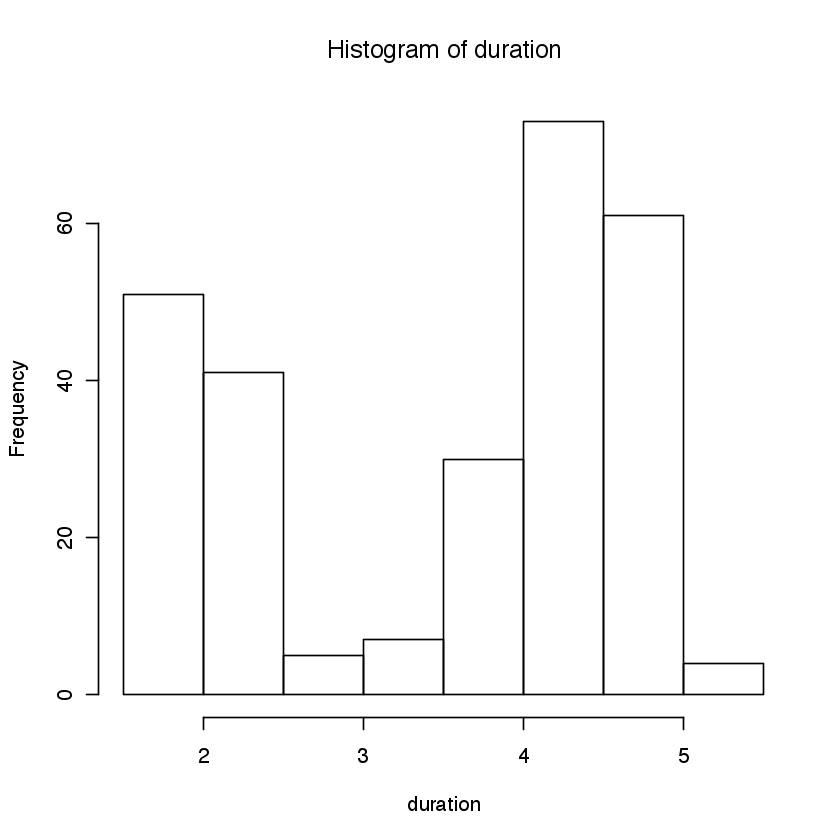

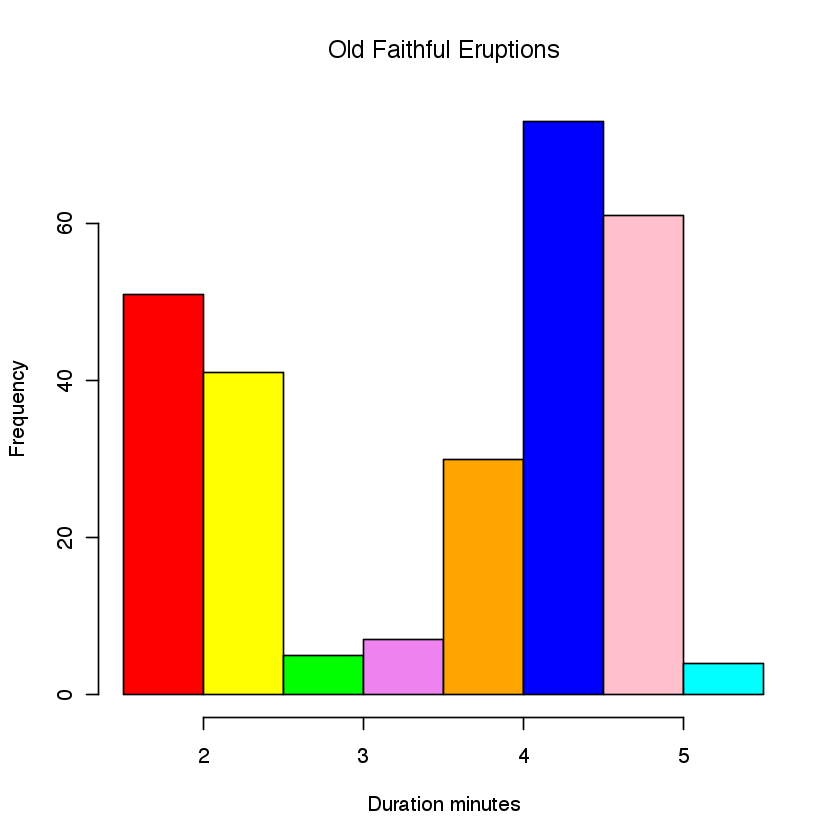

In [9]:
# apply the hist function
hist(duration, right=FALSE)    # intervals closed on the left

#To colorize the histogram, we select a color palette and set it in the col argument of hist. In addition, we update the titles for readability.

colors = c("red", "yellow", "green", "violet", "orange","blue", "pink", "cyan") 
hist(duration,    # apply the hist function 
   right=FALSE,    # intervals closed on the left 
   col=colors,     # set the color palette 
   main="Old Faithful Eruptions", # the main title 
   xlab="Duration minutes")       # x-axis label

## Exercise
Find the histogram of the eruption waiting period in faithful.
Find the histogram of the valuoes of gear and wt in the dataset **mtcars**.


## Scatter Plot

### A scatter plot pairs up values of two quantitative variables in a data set and display them as geometric points inside a Cartesian diagram. Scatter plots can strongly help in unnderstaning variables correlation!

Example Problem
Find the scatter plot of the eruption durations and waiting intervals in faithful. Does it reveal any relationship between the variables?

Solution
We apply the plot function to compute the scatter plot of eruptions and waiting.

duration,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


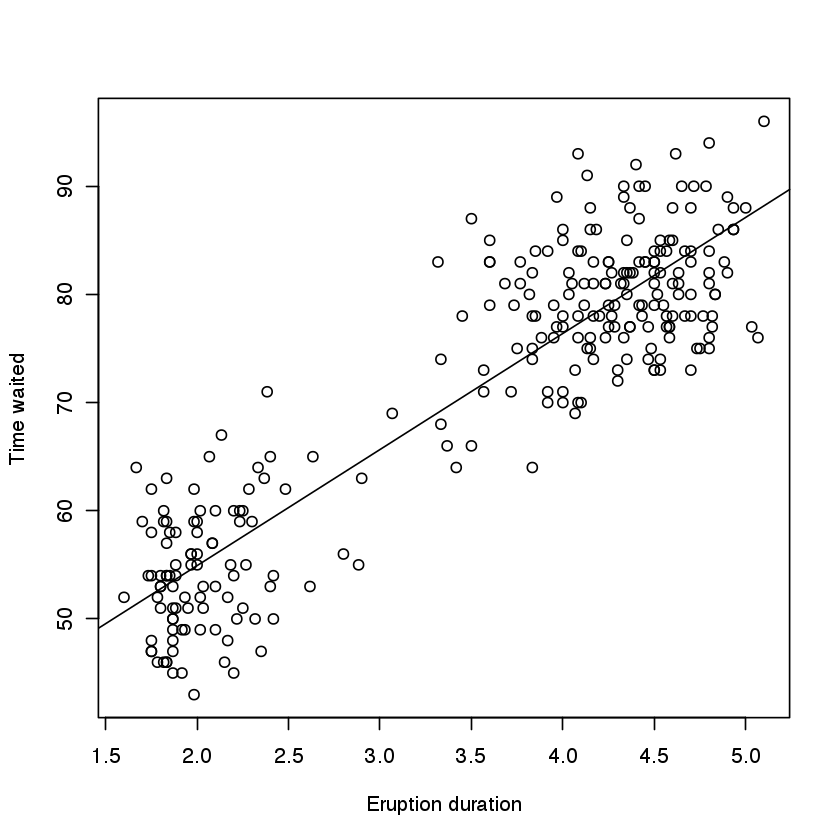

In [16]:
#duration = faithful$eruptions      # the eruption durations 
waiting = faithful$waiting         # the waiting interval 
head(cbind(duration, waiting)) 
 plot(duration, waiting,            # plot the variables 
   xlab="Eruption duration",        # x−axis label 
   ylab="Time waited")              # y−axis label

abline(lm(waiting ~ duration))

Answer
The scatter plot of the eruption durations and waiting intervals ireveals a **positive linear relationship** between them.

## Exercise
Find the relation between the variables drat and qset in mtcars.
